In [1]:
from chebpy2 import Chebfun2, Quasimatrix
import matplotlib.pyplot as plt
import chebpy as cp
import numpy as np

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
from chebpy.core.algorithms import quadwts2

In [5]:
%%time
c = Chebfun2(green, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 7.59 s, sys: 2.95 s, total: 10.5 s
Wall time: 10.5 s


In [19]:
%%time
A = c.cols[:,:]
A.T * A

CPU times: user 624 ms, sys: 95.7 ms, total: 720 ms
Wall time: 445 ms


array([[ 2.08333578e-02,  3.90739876e-03,  3.90739876e-03, ...,
         1.81167806e-07,  7.83629820e-08,  7.83629820e-08],
       [ 3.90739876e-03,  2.60417178e-03, -1.51285153e-14, ...,
         7.75043431e-15,  7.82935701e-08,  7.36380709e-20],
       [ 3.90739876e-03, -1.51285153e-14,  2.60417178e-03, ...,
         1.61996140e-07,  7.36305449e-20,  7.82935701e-08],
       ...,
       [ 1.81167806e-07,  7.75043431e-15,  1.61996140e-07, ...,
         8.04382307e-10, -3.93194120e-20, -2.66868600e-20],
       [ 7.83629820e-08,  7.82935701e-08,  7.36305449e-20, ...,
        -3.93194120e-20,  3.55494241e-10, -4.18358016e-25],
       [ 7.83629820e-08,  7.36380709e-20,  7.82935701e-08, ...,
        -2.66868600e-20, -4.18358016e-25,  3.55494241e-10]])

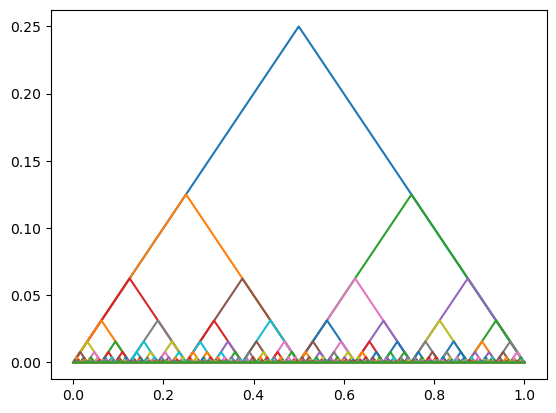

In [20]:
plt.figure()
ax = c.cols[:,:].plot()
# plt.legend(['1','2','3','4','5'])

In [21]:
import time

nn = np.linspace(2,c.cols.shape[1],c.cols.shape[1]).astype(int)
tt = np.zeros(nn.shape)
for n in nn-1:
    A = c.cols[:,:n]
    start = time.time()
    z = A.T * A
    tt[n] = time.time()-start

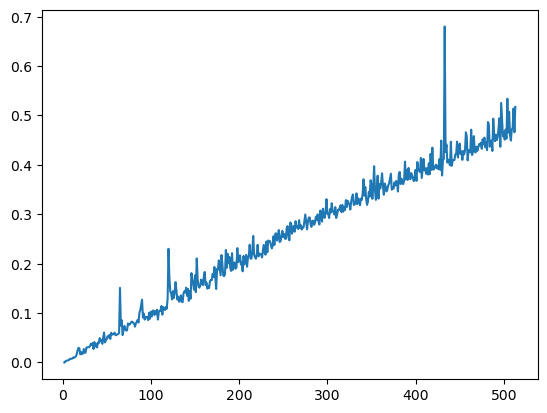

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(nn,tt)